## Load Libraries and Data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import plotly.express as px
import squarify
import numpy as np

# Load the data
cocao = pd.read_csv('flavors_of_cacao.csv')

# Link to the dataset used: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings/data

## Introduction

We are often confused by the large number of chocolates available in the market. 
In this project, by utilizing EDA and basic modeling to explore the chocolate bar rating dataset, you will get the answers to some common questions like:

1. **Which country produces the highest rate chocolate bar?**
2. **What locations produce the top quality cocoa beans?**
3. **Is there a relationship between Cocoa Percentage and the customer rating?**

**And many more...**

This project hopes to provide rough ideas on the most suitable chocolate for you according to your taste.

<img src="https://www.thespruceeats.com/thmb/IPz-vGjYi6_vyT1UyQBOLiaOFw8=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/chocolate_hero1-d62e5444a8734f8d8fe91f5631d51ca5.jpg"  width="300" length="300" align="center">


## Data Preprocessing

In [8]:
# Rename columns
cocao.columns = ["company", "bean_bar_origin", "ref", "date", "percent", "location", "rating", "bean_type", "origin"]

# Display the first few rows of the dataset
cocao.head()

,company,bean_bar_origin,ref,date,percent,location,rating,bean_type,origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Chocolate / Cocoa Industry World Map

### Chocolate Company

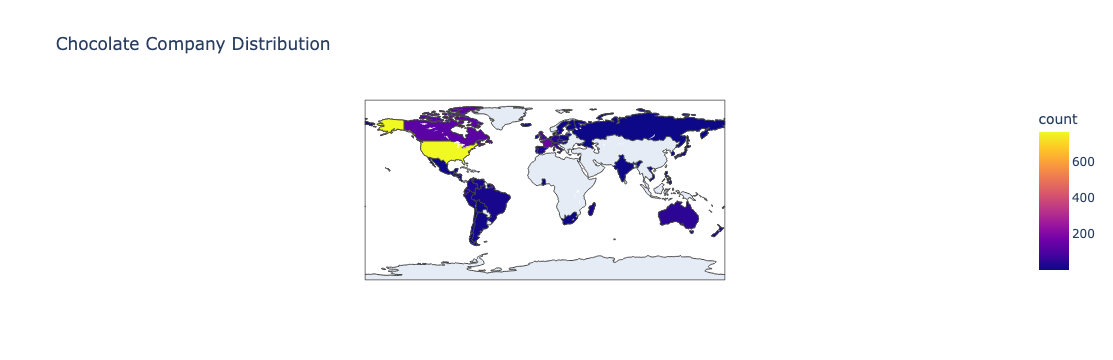

In [9]:
# Group by location
commap = cocao.groupby('location').size().reset_index(name='count')

# Plot the map
fig = px.choropleth(commap, locations="location", locationmode="country names", color="count",
                    title="Chocolate Company Distribution", color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### Cocoa Origin

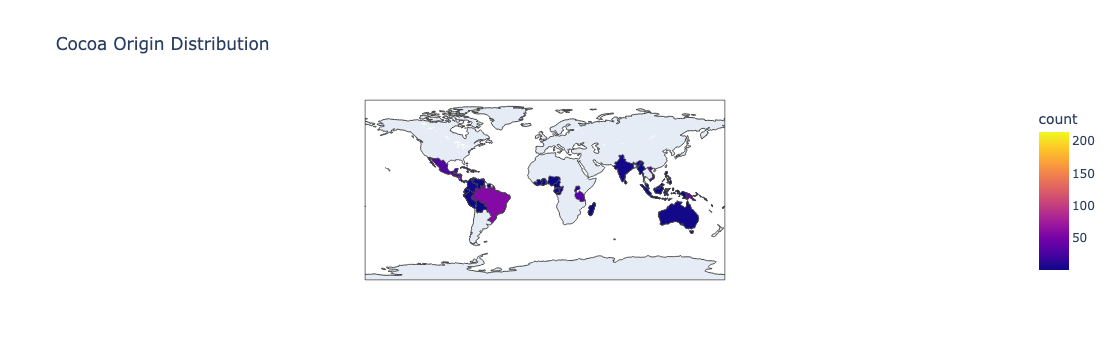

In [10]:

# Group by origin
omap = cocao.groupby('origin').size().reset_index(name='count')

# Plot the map
fig = px.choropleth(omap, locations="origin", locationmode="country names", color="count",
                    title="Cocoa Origin Distribution", color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

## Country and Highest Rate Chocolate Bars

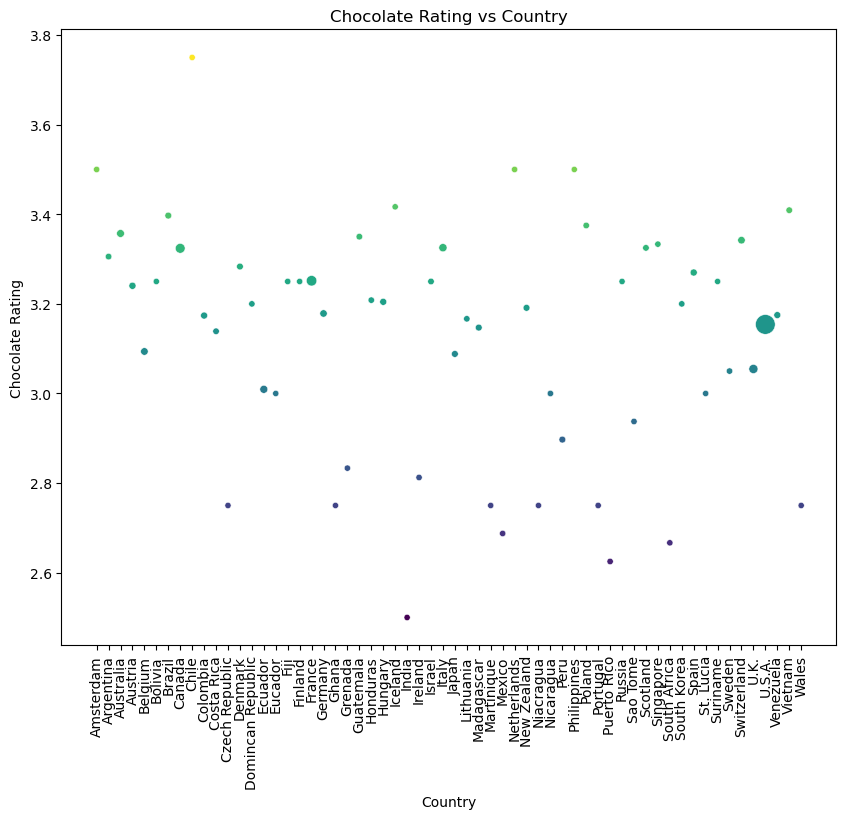

In [11]:
# Average rating by location
good = cocao.groupby('location').agg(count=('rating', 'size'), rate1=('rating', 'mean')).reset_index()

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=good, x='location', y='rate1', size='count', hue='rate1', legend=False, palette="viridis", sizes=(20, 200))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Chocolate Rating')
plt.title('Chocolate Rating vs Country')
plt.show()

## Cocoa Solid Percentage and Rating

### Scatter Plot

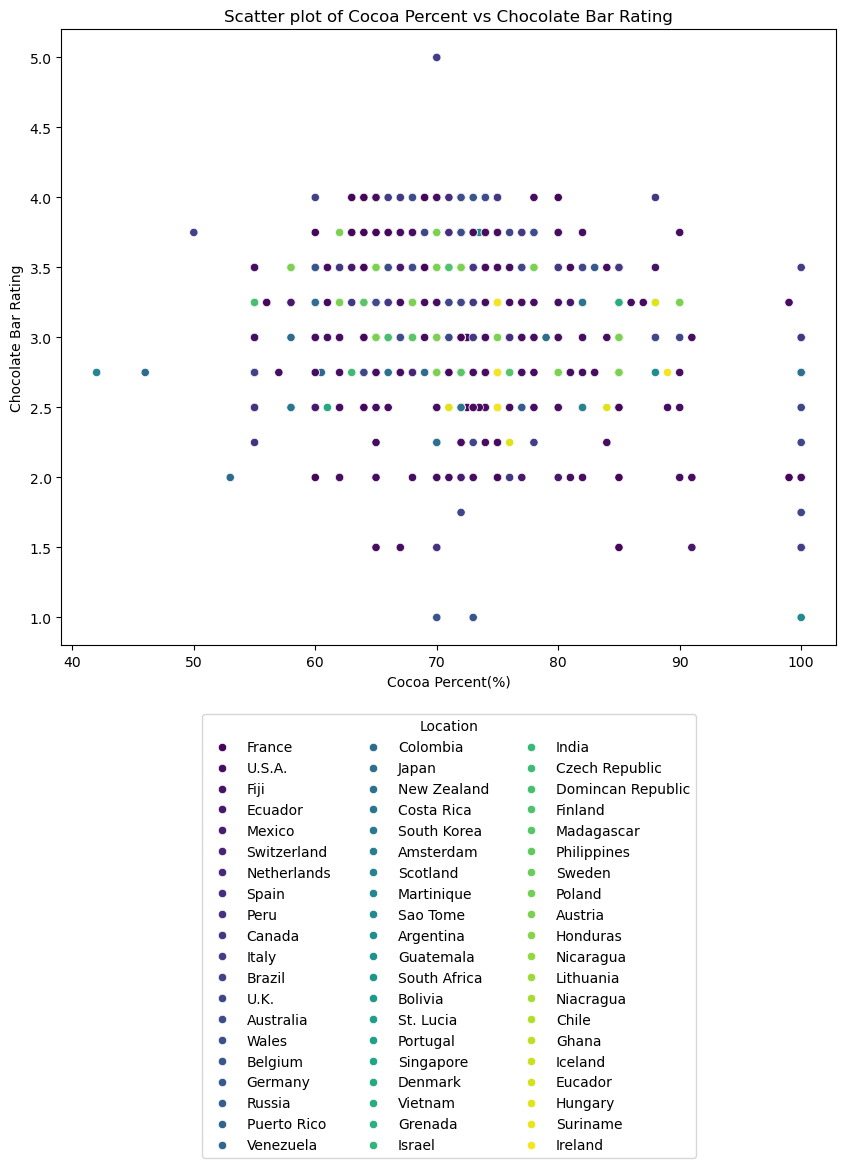

In [14]:
# Convert percentage to numerical
cocao['pct'] = cocao['percent'].str.rstrip('%').astype('float')

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cocao, x='pct', y='rating', hue='location', palette='viridis', legend='full')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, title='Location')
plt.xlabel('Cocoa Percent(%)')
plt.ylabel('Chocolate Bar Rating')
plt.title('Scatter plot of Cocoa Percent vs Chocolate Bar Rating')
plt.show()

### Scatter Plot of Average Value

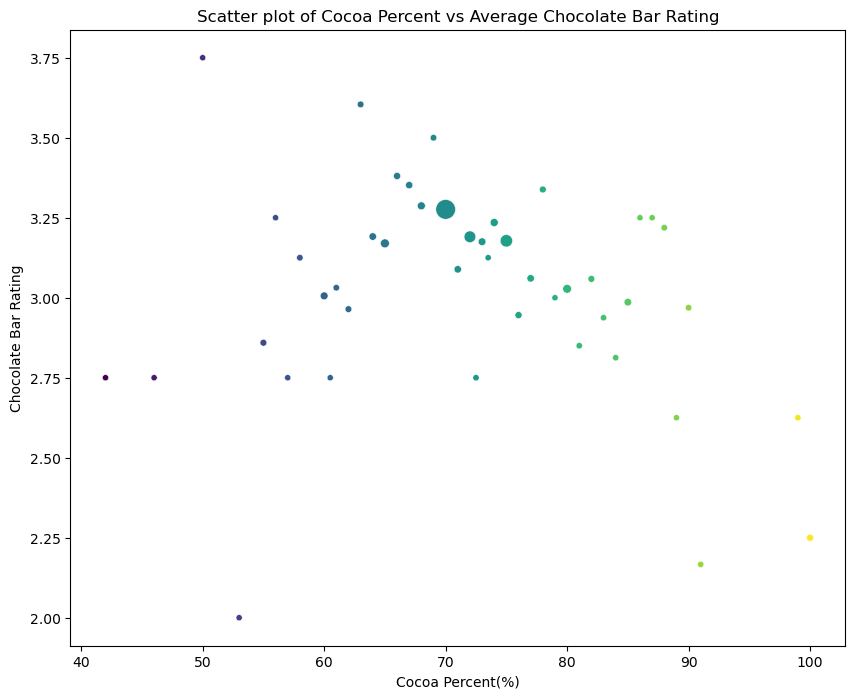

In [13]:
# Rating by percentage
pctdata = cocao.groupby('pct').agg(count=('rating', 'size'), rate2=('rating', 'mean')).reset_index()

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pctdata, x='pct', y='rate2', size='count', hue='pct', legend=False, palette="viridis", sizes=(20, 200))
plt.xlabel('Cocoa Percent(%)')
plt.ylabel('Chocolate Bar Rating')
plt.title('Scatter plot of Cocoa Percent vs Average Chocolate Bar Rating')
plt.show()

### Correlation Plot

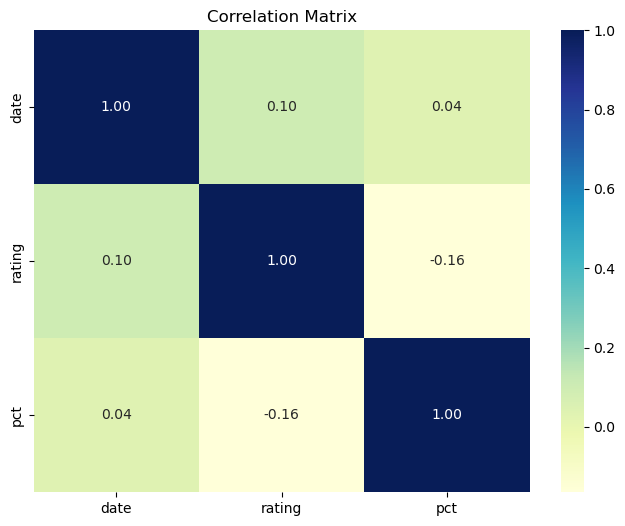

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = cocao[['date', 'rating', 'pct']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Modeling

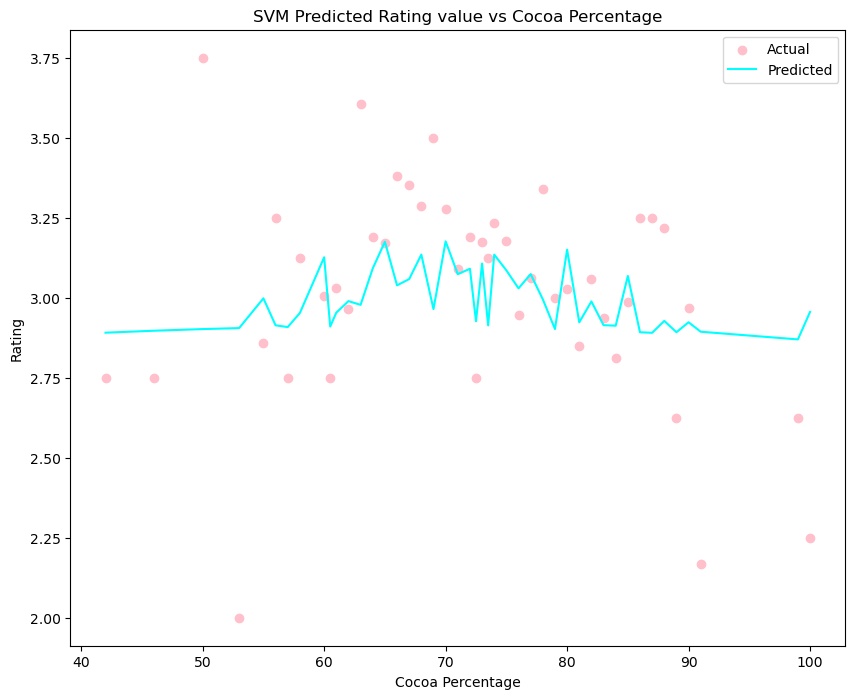

In [16]:
from sklearn.svm import SVR

# Support Vector Regression
model = SVR(kernel='rbf')
X = pctdata[['pct', 'count']]
y = pctdata['rate2']
model.fit(X, y)
pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(pctdata['pct'], pctdata['rate2'], color='pink', label='Actual')
plt.plot(pctdata['pct'], pred, color='cyan', label='Predicted')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.title('SVM Predicted Rating value vs Cocoa Percentage')
plt.legend()
plt.show()

### Categorized Percentage

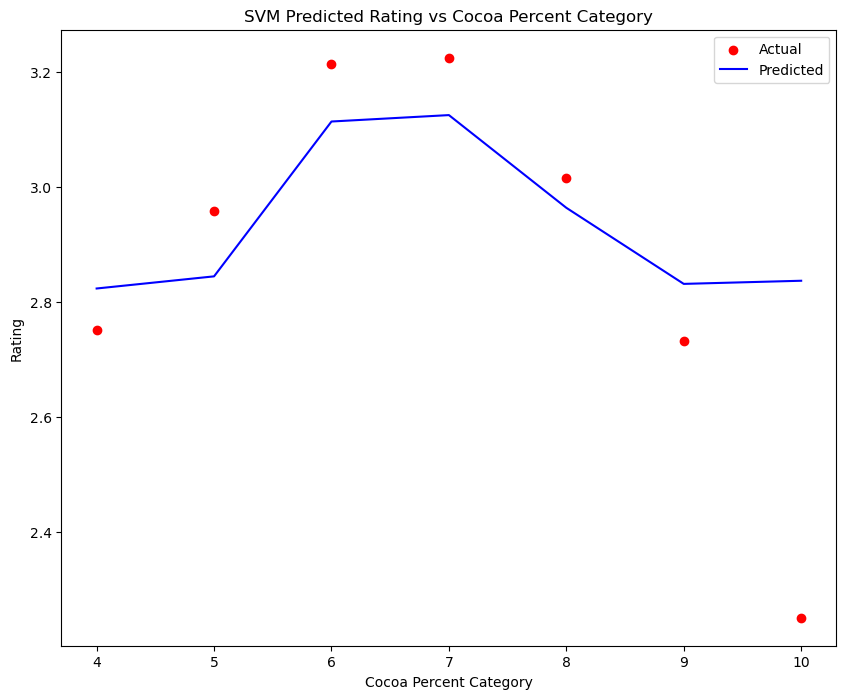

In [17]:
# Categorize the percentage of cocoa
cocao['p1'] = (cocao['pct'] // 10).astype(int)

# Group by categorized percentage
gdp1 = cocao.groupby('p1').agg(count=('rating', 'size'), rate3=('rating', 'mean')).reset_index()

# SVM Model
model_c1 = SVR(kernel='rbf')
X = gdp1[['p1', 'count']]
y = gdp1['rate3']
model_c1.fit(X, y)
pred_c1 = model_c1.predict(X)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(gdp1['p1'], gdp1['rate3'], color='red', label='Actual')
plt.plot(gdp1['p1'], pred_c1, color='blue', label='Predicted')
plt.xlabel('Cocoa Percent Category')
plt.ylabel('Rating')
plt.title('SVM Predicted Rating vs Cocoa Percent Category')
plt.legend()
plt.show()

## Cocoa Bean Origin

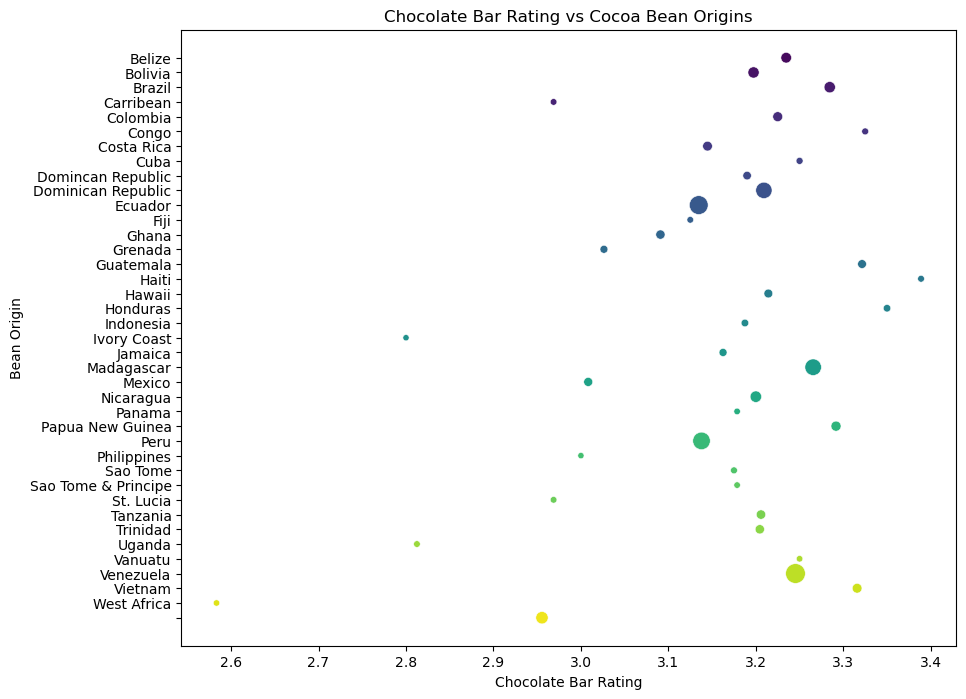

In [18]:
# Group by bean origin and filter by count >= 5
bean = cocao.groupby('origin').agg(count=('rating', 'size'), rate5=('rating', 'mean')).reset_index()
bean = bean[bean['count'] >= 5]

# Scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=bean, x='rate5', y='origin', size='count', hue='origin', legend=False, palette="viridis", sizes=(20, 200))
plt.xlabel('Chocolate Bar Rating')
plt.ylabel('Bean Origin')
plt.title('Chocolate Bar Rating vs Cocoa Bean Origins')
plt.show()

## Additional Exploratory

### Chocolate Bar Rating by Year

<Figure size 1400x1000 with 0 Axes>

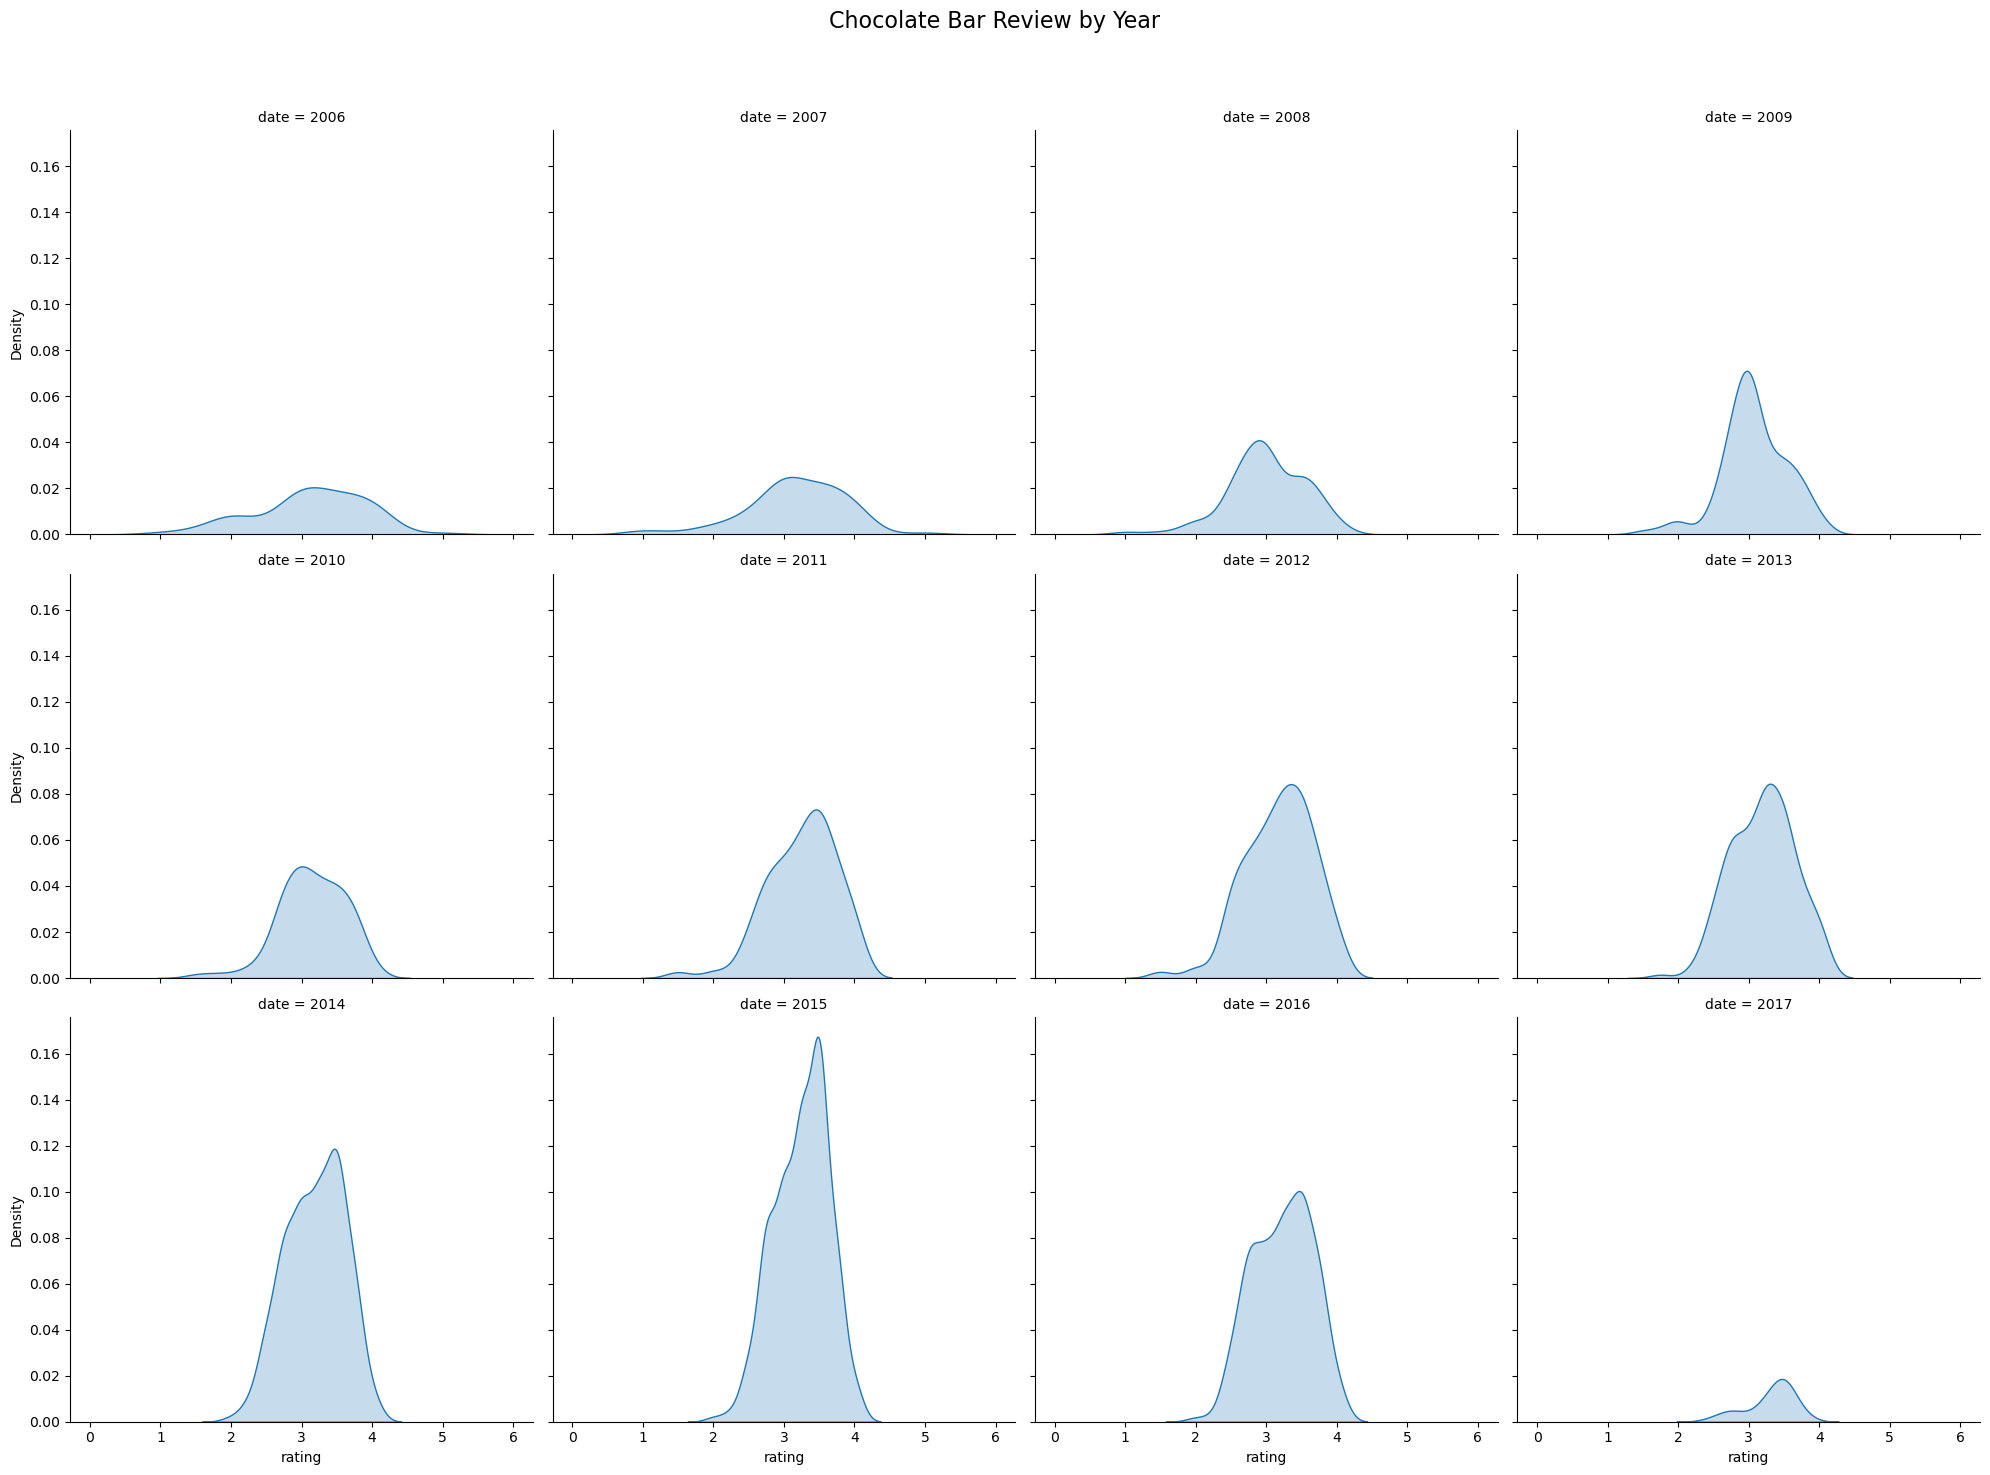

In [21]:
# Density plot by year
plt.figure(figsize=(14, 10))
sns.displot(cocao, x='rating', col='date', col_wrap=4, kind='kde', fill=True)
plt.subplots_adjust(top=0.9)
plt.suptitle('Chocolate Bar Review by Year', fontsize=16)
plt.show()

### Chocolate Bar Rating by Country and Year

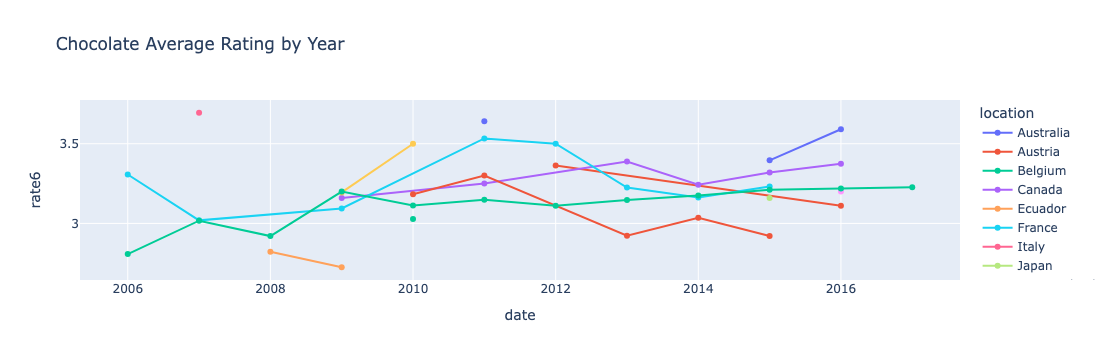

In [22]:
# Group by country and year
cyear = cocao.groupby(['location', 'date']).agg(count=('rating', 'size'), rate6=('rating', 'mean')).reset_index()
cyear = cyear[cyear['count'] >= 9]

# Plot
fig = px.line(cyear, x='date', y='rate6', color='location', line_group='location', hover_name='location', 
              title='Chocolate Average Rating by Year', markers=True)
fig.show()


### Best Chocolate Bar with Large Production Volume

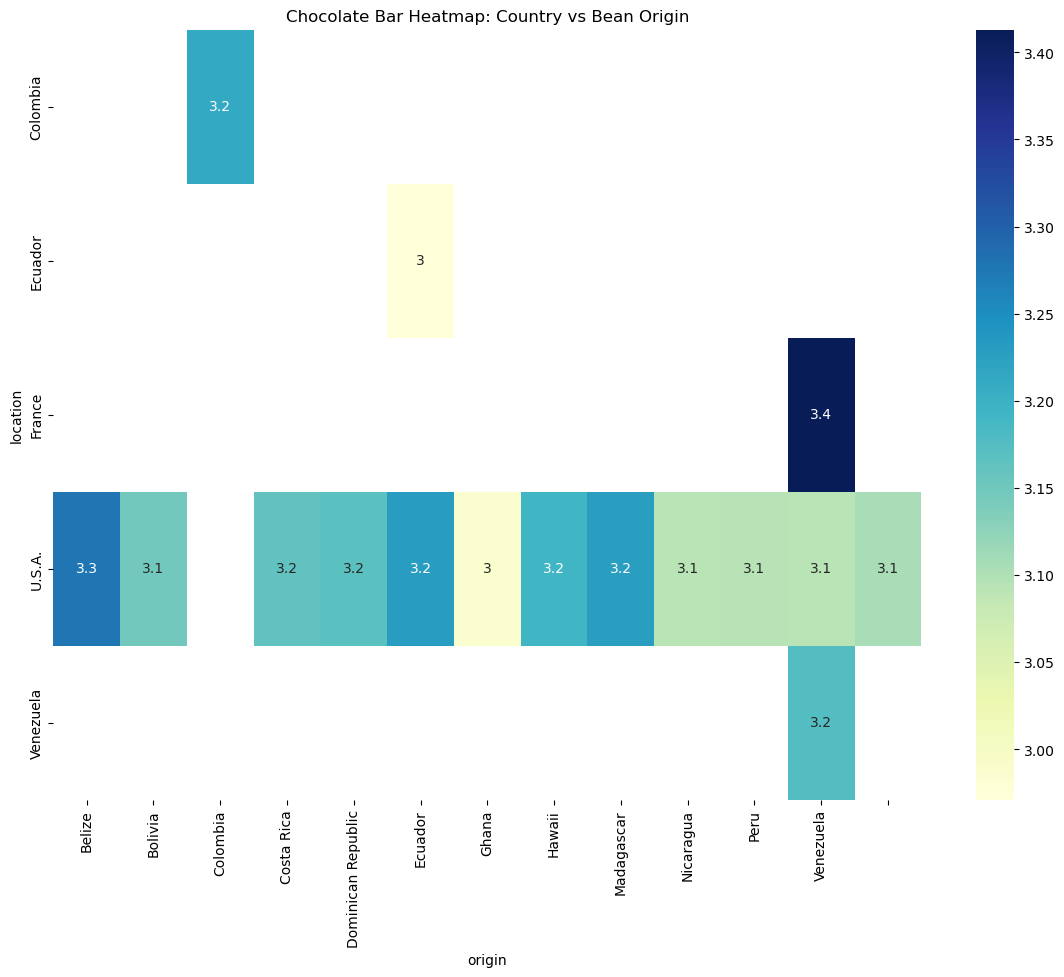

In [24]:
# Group by origin and location with count >= 20
orig = cocao.groupby(['origin', 'location']).agg(count=('rating', 'size'), rate4=('rating', 'mean')).reset_index()
orig = orig[orig['count'] >= 20]

# Heatmap
plt.figure(figsize=(14, 10))
pivot_table = orig.pivot(index="location", columns="origin", values="rate4")
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Chocolate Bar Heatmap: Country vs Bean Origin')
plt.show()

### Chocolate Bar by Company

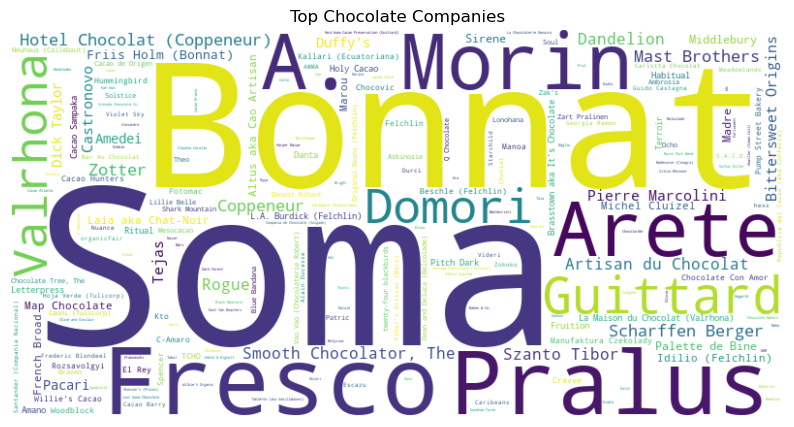

In [28]:
from wordcloud import WordCloud

# Wordcloud
names = cocao['company'].value_counts().reset_index()
names.columns = ['company', 'count']
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(zip(names['company'], names['count'])))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Chocolate Companies')
plt.show()

### Violin Plot

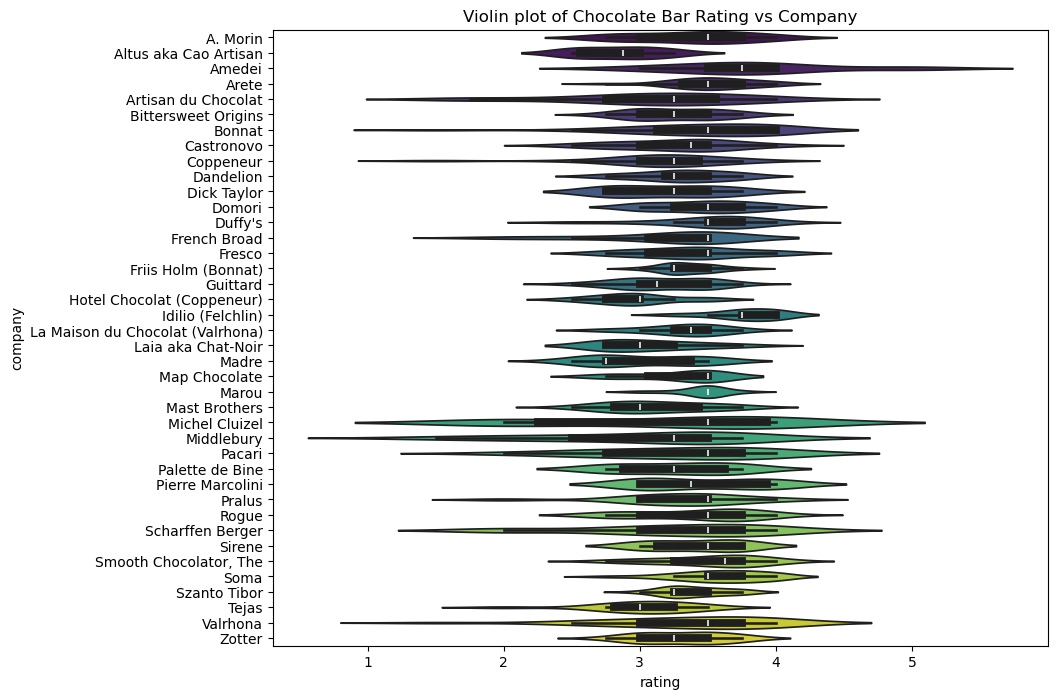

In [31]:
# Violin plot for companies with >= 10 records
comp = cocao.groupby('company').filter(lambda x: len(x) >= 10)

# Plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='rating', y='company', data=comp, density_norm='width', hue='company', palette='viridis')
plt.title('Violin plot of Chocolate Bar Rating vs Company')
plt.show()

## Summary

In [34]:
# Will add later